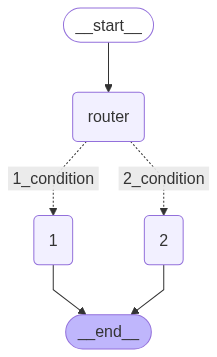

'1_condition(HeyJohn, how are you?)'

In [19]:
from random import randint
from typing import TypedDict

from langgraph.graph import StateGraph,START,END

class AgentState(TypedDict):
    message: str
    condition: str
    
def gretting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""
    state["message"] = state["condition"] + "(Hey" + state["message"] + ", how are you?)"
    return state

def router_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph """
    random_contion = randint(1,2)
    if random_contion == 1:
        state["condition"] = "1_condition"
        return state
    else:
        state["condition"] = "2_condition"
        return state

def get_router_condition(state: AgentState) -> str:
    """This node will select the next node of the graph """
    return state["condition"]
    

graph = StateGraph(AgentState)
graph.add_node("1", gretting_node)
graph.add_node("2", gretting_node)
# graph.add_node("router",lambda state: state)
graph.add_node("router",router_node)

graph.add_edge(START,"router")
graph.add_conditional_edges("router",
                            get_router_condition,
                            {"1_condition":"1","2_condition":"2"}
                            )

graph.add_edge("1",END)
graph.add_edge("2",END)

app = graph.compile()

from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))
result = app.invoke({"message": "John","condition": "？"})

result["message"]